In [18]:
.libPaths(c("/home/jpm73279/.conda/envs/R_final_install/lib/R/library", .libPaths()))
library(devtools)
library(tidyverse)
library(bedtoolsr)
library(ggrepel)
library(patchwork)

# Quantify the number of ACRs which are close within 1/2 genes which are CTS NOT using cicero

In [19]:
# Define a function to read the data and add columns
read_and_annotate_intersect <- function(file_path, cell_type, species_abbr) {
  read_delim(file_path, delim = "\t", col_names = FALSE, col_types = "cccccccccc") %>%
    dplyr::mutate(
      cts_acts = cell_type,
      species = species_abbr
    )
}

# Define a function to read the data and add columns
read_and_annotate_closests <- function(file_path, cell_type, species_abbr) {
  read_delim(file_path, delim = "\t", col_names = FALSE,col_types = "ccccccccccdd") %>%
    dplyr::mutate(
      cts_acts = cell_type,
      species = species_abbr
    )
}
# Define a function to read the data and add columns
read_and_annotate <- function(file_path, cell_type, species_abbr) {
  read_delim(file_path, delim = "\t", col_names = FALSE) %>%
    dplyr::mutate(
      cts_acts = cell_type,
      species = species_abbr
    )
}

In [20]:
marker_file_paths <- c("/home/jpm73279/genome_downloads/C4_markers/Os.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Pm.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Sb.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Uf.c4_markers.bed",
                "/home/jpm73279/genome_downloads/C4_markers/Zm.c4_markers.bed")

# Function to read and process the file
process_file <- function(file_path) {
  species <- substr(basename(file_path), 1, 2)
  read_delim(file_path, delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
    dplyr::select("chrom","start","end","geneID","name","type") %>%
    dplyr::mutate(species = tolower(species))
}

# Apply the function to each file and store results in a list
list_of_dataframes <- lapply(marker_file_paths, process_file)

# Optionally combine all dataframes into one if needed
markers <- bind_rows(list_of_dataframes) %>% 
    dplyr::select(species, name, type)

Rows: 29 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 52 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 32 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom, geneID, name, type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 31 Columns: 6

In [21]:
# Define the files and conditions to be processed
#Old set not based off of updated Bs/Procambium CTS ACR allowanges
# files_conditions <- list(
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Os_bs_acrs_intersect.bed", cell_type = "bundle_sheath", species = "os"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Os_ms_acrs_intersect.bed", cell_type = "mesophyll", species = "os"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Pm_bs_acrs_intersect.bed", cell_type = "bundle_sheath", species = "pm"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Pm_ms_acrs_intersect.bed", cell_type = "mesophyll", species = "pm"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Sb_bs_acrs_intersect.bed", cell_type = "bundle_sheath", species = "sb"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Sb_ms_acrs_intersect.bed", cell_type = "mesophyll", species = "sb"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Uf_bs_acrs_intersect.bed", cell_type = "bundle_sheath", species = "uf"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Uf_ms_acrs_intersect.bed", cell_type = "mesophyll", species = "uf"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Zm_bs_acrs_intersect.bed", cell_type = "bundle_sheath", species = "zm"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Zm_ms_acrs_intersect.bed", cell_type = "mesophyll", species = "zm")
# )





files_conditions <- list(
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/os.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "os"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/os.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "os"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/pm.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "pm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/pm.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "pm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/sb.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "sb"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/sb.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "sb"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/uf.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "uf"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/uf.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "uf"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/zm.extended_c4_genes.bundle_sheath.intersection.bed", cell_type = "bundle_sheath", species = "zm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/zm.extended_c4_genes.mesophyll.intersection.bed", cell_type = "mesophyll", species = "zm")
)




# Read and annotate each file and store results in a list
annotated_data_list <- lapply(files_conditions, function(condition) {
  read_and_annotate_intersect(condition$path, condition$cell_type, condition$species)
})

# Combine results
combined_acrs_species <- bind_rows(annotated_data_list)

In [22]:
combined_acrs_species %>% 
    dplyr::filter(species == "os")

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,cts_acts,species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chr1,37770403,37790110,LOC_Os01g65090,Os__AspAT_2,Chr1,37773729,37774230,scACR_7407;bundle_sheath,3.571301024963394e-5,bundle_sheath,os
Chr12,11288955,11362595,LOC_Os12g19470,Os__RBCS_1,Chr12,11290451,11290952,scACR_17629;bundle_sheath,7.142602049926788e-5,bundle_sheath,os
Chr5,19707432,19742290,LOC_Os05g33570,Os__PPDK_1,Chr5,19728128,19728629,scACR_42532;bundle_sheath,0,bundle_sheath,os
Chr7,20754511,20783030,LOC_Os07g34640,Os__PPDKRP_1,Chr7,20764358,20764859,scACR_52889;bundle_sheath,3.571301024963394e-5,bundle_sheath,os
Chr7,25481162,25508560,LOC_Os07g42600,Os__AlaAT_3,Chr7,25484474,25484975,scACR_53967;bundle_sheath,0,bundle_sheath,os
Chr7,25481162,25508560,LOC_Os07g42600,Os__AlaAT_3,Chr7,25502776,25503277,scACR_53973;bundle_sheath,0,bundle_sheath,os
Chr7,25481162,25508560,LOC_Os07g42600,Os__AlaAT_3,Chr7,25506366,25506867,scACR_53976;bundle_sheath,7.142602049926788e-5,bundle_sheath,os
Chr1,5884572,5918162,LOC_Os01g11054,Os__PEPC_1,Chr1,5899326,5899827,scACR_1352;mesophyll,0,mesophyll,os
Chr1,25683076,25742033,LOC_Os01g45274,Os__CA_1,Chr1,25692332,25692833,scACR_4585;mesophyll,0,mesophyll,os


In [23]:
# closest_files <- list(
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Os_bs_acrs_closest.bed", cell_type = "bundle_sheath", species = "os"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Os_ms_acrs_closest.bed", cell_type = "mesophyll", species = "os"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Pm_bs_acrs_closest.bed", cell_type = "bundle_sheath", species = "pm"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Pm_ms_acrs_closest.bed", cell_type = "mesophyll", species = "pm"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Sb_bs_acrs_closest.bed", cell_type = "bundle_sheath", species = "sb"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Sb_ms_acrs_closest.bed", cell_type = "mesophyll", species = "sb"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Uf_bs_acrs_closest.bed", cell_type = "bundle_sheath", species = "uf"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Uf_ms_acrs_closest.bed", cell_type = "mesophyll", species = "uf"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Zm_bs_acrs_closest.bed", cell_type = "bundle_sheath", species = "zm"),
#   list(path = "/home/jpm73279/genome_downloads/C4_markers/Zm_ms_acrs_closest.bed", cell_type = "mesophyll", species = "zm")
# )

closest_files <- list(
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/os.extended_c4_genes.bundle_sheath.closest.bed", cell_type = "bundle_sheath", species = "os"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/os.extended_c4_genes.mesophyll.closest.bed", cell_type = "mesophyll", species = "os"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/pm.extended_c4_genes.bundle_sheath.closest.bed", cell_type = "bundle_sheath", species = "pm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/pm.extended_c4_genes.mesophyll.closest.bed", cell_type = "mesophyll", species = "pm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/sb.extended_c4_genes.bundle_sheath.closest.bed", cell_type = "bundle_sheath", species = "sb"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/sb.extended_c4_genes.mesophyll.closest.bed", cell_type = "mesophyll", species = "sb"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/uf.extended_c4_genes.bundle_sheath.closest.bed", cell_type = "bundle_sheath", species = "uf"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/uf.extended_c4_genes.mesophyll.closest.bed", cell_type = "mesophyll", species = "uf"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/zm.extended_c4_genes.bundle_sheath.closest.bed", cell_type = "bundle_sheath", species = "zm"),
  list(path = "/scratch/jpm73279/comparative_single_cell/07.call.ACRs/08.C4_gene_relationship/intersections/zm.extended_c4_genes.mesophyll.closest.bed", cell_type = "mesophyll", species = "zm")
)

# Read and annotate each file and store results in a list
closest_acr_lsit <- lapply(closest_files, function(condition) {
  read_and_annotate_closests(condition$path, condition$cell_type, condition$species)
})

# Combine results
closest_acrs_to_species <- bind_rows(closest_acr_lsit)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


In [24]:
glimpse(closest_acr_lsit)

List of 10
 $ : tibble [290 × 14] (S3: tbl_df/tbl/data.frame)
  ..$ X1      : chr [1:290] "Chr1" "Chr1" "Chr1" "Chr1" ...
  ..$ X2      : chr [1:290] "4738904" "4738904" "4738904" "4738904" ...
  ..$ X3      : chr [1:290] "4744591" "4744591" "4744591" "4744591" ...
  ..$ X4      : chr [1:290] "LOC_Os01g09320" "LOC_Os01g09320" "LOC_Os01g09320" "LOC_Os01g09320" ...
  ..$ X5      : chr [1:290] "Os__NADPME_1" "Os__NADPME_1" "Os__NADPME_1" "Os__NADPME_1" ...
  ..$ X6      : chr [1:290] "mesophyll" "mesophyll" "mesophyll" "mesophyll" ...
  ..$ X7      : chr [1:290] "Chr1" "Chr1" "Chr1" "Chr1" ...
  ..$ X8      : chr [1:290] "4812705" "4649153" "4918939" "4923579" ...
  ..$ X9      : chr [1:290] "4813206" "4649654" "4919440" "4924080" ...
  ..$ X10     : chr [1:290] "scACR_1082;bundle_sheath" "scACR_1033;bundle_sheath" "scACR_1115;bundle_sheath" "scACR_1116;bundle_sheath" ...
  ..$ X11     : num [1:290] 0.00 0.00 0.00 0.00 3.57e-05 ...
  ..$ X12     : num [1:290] 68115 89251 174349 178989 218

In [62]:
closest_acrs_to_species %>% 
    dplyr::filter(species == "zm") %>% 
    dplyr::filter(X5 == "Zm__RBCS_2")

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,cts_acts,species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
chr2,147040782,147041974,Zm00001eb092540,Zm__RBCS_2,bundle_sheath,chr2,148334504,148335005,"scACR_16211;bundle_sheath,procambial_meristem",NA,1292531,bundle_sheath,zm
chr2,147040782,147041974,Zm00001eb092540,Zm__RBCS_2,bundle_sheath,chr2,145535381,145535882,scACR_16155;bundle_sheath,0.0084997167,1504901,bundle_sheath,zm
chr2,147040782,147041974,Zm00001eb092540,Zm__RBCS_2,bundle_sheath,chr2,150093028,150093529,scACR_16249;bundle_sheath,0.0276324123,3051055,bundle_sheath,zm
chr2,147040782,147041974,Zm00001eb092540,Zm__RBCS_2,bundle_sheath,chr2,152995649,152996150,scACR_16290;bundle_sheath,0.0100663311,5953676,bundle_sheath,zm
chr2,147040782,147041974,Zm00001eb092540,Zm__RBCS_2,bundle_sheath,chr2,154568893,154569394,scACR_16324;bundle_sheath,0.0245138912,7526920,bundle_sheath,zm
chr2,147040782,147041974,Zm00001eb092540,Zm__RBCS_2,bundle_sheath,chr2,138770061,138770562,scACR_16062;bundle_sheath,0.0282990567,8270221,bundle_sheath,zm
chr2,147040782,147041974,Zm00001eb092540,Zm__RBCS_2,bundle_sheath,chr2,137217686,137218187,"scACR_16044;bundle_sheath,procambial_meristem",NA,9822596,bundle_sheath,zm
chr2,147040782,147041974,Zm00001eb092540,Zm__RBCS_2,bundle_sheath,chr2,136912359,136912860,scACR_16039;bundle_sheath,0.0281657278,10127923,bundle_sheath,zm
chr2,147040782,147041974,Zm00001eb092540,Zm__RBCS_2,bundle_sheath,chr2,158012219,158012720,scACR_16385;bundle_sheath,0.0015999467,10970246,bundle_sheath,zm


In [26]:
head(combined_acrs_species)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,cts_acts,species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chr1,37770403,37790110,LOC_Os01g65090,Os__AspAT_2,Chr1,37773729,37774230,scACR_7407;bundle_sheath,3.571301024963394e-5,bundle_sheath,os
Chr12,11288955,11362595,LOC_Os12g19470,Os__RBCS_1,Chr12,11290451,11290952,scACR_17629;bundle_sheath,7.142602049926788e-5,bundle_sheath,os
Chr5,19707432,19742290,LOC_Os05g33570,Os__PPDK_1,Chr5,19728128,19728629,scACR_42532;bundle_sheath,0,bundle_sheath,os
Chr7,20754511,20783030,LOC_Os07g34640,Os__PPDKRP_1,Chr7,20764358,20764859,scACR_52889;bundle_sheath,3.571301024963394e-5,bundle_sheath,os
Chr7,25481162,25508560,LOC_Os07g42600,Os__AlaAT_3,Chr7,25484474,25484975,scACR_53967;bundle_sheath,0,bundle_sheath,os
Chr7,25481162,25508560,LOC_Os07g42600,Os__AlaAT_3,Chr7,25502776,25503277,scACR_53973;bundle_sheath,0,bundle_sheath,os


In [27]:
head(closest_acrs_to_species)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,cts_acts,species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Chr1,4738904,4744591,LOC_Os01g09320,Os__NADPME_1,mesophyll,Chr1,4812705,4813206,scACR_1082;bundle_sheath,0.000000e+00,68115,bundle_sheath,os
Chr1,4738904,4744591,LOC_Os01g09320,Os__NADPME_1,mesophyll,Chr1,4649153,4649654,scACR_1033;bundle_sheath,0.000000e+00,89251,bundle_sheath,os
Chr1,4738904,4744591,LOC_Os01g09320,Os__NADPME_1,mesophyll,Chr1,4918939,4919440,scACR_1115;bundle_sheath,0.000000e+00,174349,bundle_sheath,os
Chr1,4738904,4744591,LOC_Os01g09320,Os__NADPME_1,mesophyll,Chr1,4923579,4924080,scACR_1116;bundle_sheath,0.000000e+00,178989,bundle_sheath,os
Chr1,4738904,4744591,LOC_Os01g09320,Os__NADPME_1,mesophyll,Chr1,4963287,4963788,scACR_1127;bundle_sheath,3.571301e-05,218697,bundle_sheath,os
Chr1,4738904,4744591,LOC_Os01g09320,Os__NADPME_1,mesophyll,Chr1,5093675,5094176,scACR_1168;bundle_sheath,3.571301e-05,349085,bundle_sheath,os


In [28]:
#glimpse(closest_acrs_to_species)

closest_acrs_filtered <- closest_acrs_to_species %>% 
    dplyr::select(X5,X10,X12) %>% 
    dplyr::rename("distance" = X12)


combined_C4_genes_acr_intersections_distance <- left_join(combined_acrs_species, closest_acrs_filtered, by = c("X5", "X9" = "X10")) %>% 
    dplyr::left_join(., markers, by = c("species", "X5" = "name")) %>% 
    dplyr::rename(name = X5)





In [29]:
zm_genes_keeping <- c(
  'PEPCK', 'RBCA1', 'RBCA2', 'RUBISCO_activase1', 'RUBISCO_activase2', 'DIC', 
  'PPT', 'PPDK', 'CA2', 'CA3', 'CA1', 'PEPC1', "NADP_ME1", "NADP_MDH", "DIT2", "DIT1"
)

sb_genes_keeping <- c(
  'PEPCK', 'RBCA2__RBCA1', 'RUBISCO_activase1', 'DIC', 'PPT', 'PPDK',
  'CA6_ortho_count_1', 'CA6_ortho_count_2', 'CA1', 'PEPC1', "NADP_ME1_ortho_count_2", 
  "NADP_ME1_ortho_count_1", "NADP_MDH_ortho_count_1", "NADP_MDH_ortho_count_2"
)

pm_genes_keeping <- c(
  'PEP-CK_1', 'PEP-CK_2', 'PEP-CK_3', 'RBCA2_ortho_count_1__RBCA1_ortho_count_1', 
  'RBCA2_ortho_count_3__RBCA1_ortho_count_3', 'RBCA2_ortho_count_4__RBCA1_ortho_count_4', 
  'RBCA2_ortho_count_5__RBCA1_ortho_count_5', 'RBCA2_ortho_count_6__RBCA1_ortho_count_6', 
  'RUBISCO_activase1_ortho_count_1', 'DIC1_', 'PPT_1', 'PPT_2', 'PPT_3', 'PPT_4', 'PPDK_1', 
  'PPDK_2', 'CA6_ortho_count_1', 'CA6_ortho_count_2', 'CA_2', 'PEPC_1', 'PEPC_2', "NAD-ME_1", 
  "NAD-ME_2", "AspAT_1", "AspAT_2"
)

uf_genes_keeping <- c(
  "PEPCK", "RBCA2_ortho_count_1__RBCA1_ortho_count_1", "RBCA2_ortho_count_2__RBCA1_ortho_count_2", 
  "RBCA2_ortho_count_3__RBCA1_ortho_count_3", "RUBISCO_activase1", "DIC", "PPT", "PPDK", "CA4", 
  "CA6", "PEPC1_ortho_count_1", "PEPC1_ortho_count_2", "NAD-ME_1_ortho_count_1__NAD-ME_2_ortho_count_1", 
  "NAD-ME_1_ortho_count_2__NAD-ME_2_ortho_count_2", "NAD-ME_1_ortho_count_3__NAD-ME_2_ortho_count_3"
)

os_genes_keeping <- c(
  'PEPCK', 'RBCA2_ortho_count_1__RBCA1_ortho_count_1', 'RBCA2_ortho_count_2__RBCA1_ortho_count_2', 
  'RBCA2_ortho_count_3__RBCA1_ortho_count_3', 'RUBISCO_activase1', 'DIC1__ortho_count_2', 'PPDK_1', 
  'CA_1__CA_2', 'PEPC', "PEP-CK_3", "NAD-ME_1__NAD-ME_2", "NAD-MDH12"
)



 combined_C4_genes_acr_intersections_distance.filtered <- combined_C4_genes_acr_intersections_distance# %>% 
#    filter(
#     case_when(
#         species == "zm" & name %in% zm_genes_keeping ~ TRUE,
#         species == "sb" & name %in% sb_genes_keeping ~ TRUE,
#         species == "pm" & name %in% pm_genes_keeping ~ TRUE,
#         species == "uf" & name %in% uf_genes_keeping ~ TRUE,
#         species == "os" & name %in% os_genes_keeping ~ TRUE,
#         TRUE ~ FALSE)) %>% 
#         mutate(name = str_replace_all(name, "_ortho_count_", "_")) %>% 
#     dplyr::mutate(type = case_when(species == "os" & type == "bundle_sheath" ~ "mesophyll", 
#                                   TRUE ~ type))


In [30]:
graphing_matrix_c4_genes <- combined_C4_genes_acr_intersections_distance.filtered %>% 
    ungroup() %>% 
   # dplyr::mutate(up_down_val = case_when(
        #type == cts_acts ~ 1,
        #type != cts_acts ~ -1
   # )) %>% 
    group_by(species, name, cts_acts, type) %>% 
    summarise(n_acrs = n(),
              #n_ctsacrs_same_type = sum(up_down_val),
             mean_distance = mean(distance, na.rm = TRUE),
             )

`summarise()` has grouped output by 'species', 'name', 'cts_acts'. You can
override using the `.groups` argument.


In [41]:
colnames(c4_gene_summary)

[1] "species"       "species2"      "gene_family"   "gene_number"  
[5] "cts_acts"      "type"          "n_acrs"        "mean_distance"

In [63]:
 c4_gene_summary <- graphing_matrix_c4_genes %>% 
    tidyr::separate(name, into = c("species2", "gene_name"), sep = "__") %>% 
    tidyr::separate(gene_name, into = c("gene_family", "gene_number"), sep = "_") %>% 
    arrange(graphing_matrix_c4_genes, gene_family) 

c4_gene_summary %>% 
    dplyr::filter(gene_family == "PEPC")


Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1 rows [19].”


species,species2,gene_family,gene_number,cts_acts,type,n_acrs,mean_distance
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
sb,Sb,PEPC,1,mesophyll,mesophyll,5,319.60000
zm,Zm,PEPC,1,mesophyll,mesophyll,3,64.66667
pm,Pm,PEPC,1,mesophyll,mesophyll,4,1541.50000
pm,Pm,PEPC,2,mesophyll,mesophyll,3,2056.00000
uf,Uf,PEPC,1,mesophyll,mesophyll,1,39.00000
uf,Uf,PEPC,2,mesophyll,mesophyll,2,0.50000
os,Os,PEPC,1,mesophyll,mesophyll,1,0.00000


In [60]:
c4_gene_summary %>% 
    dplyr::filter(species == "zm")

species,species2,gene_family,gene_number,cts_acts,type,n_acrs,mean_distance
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
zm,ZM,AlaAT,2,mesophyll,mesophyll,1,54967.00000
zm,ZM,AlaAT,4,bundle_sheath,"mesophyll,bundle_sheath",1,1263.00000
zm,ZM,AlaAT,6,bundle_sheath,bundle_sheath,2,0.00000
zm,ZM,AlaAT,7,bundle_sheath,"mesophyll,bundle_sheath",1,0.00000
zm,Zm,CA,1,mesophyll,mesophyll,4,900.50000
zm,Zm,CA,2,mesophyll,mesophyll,4,37851.75000
zm,Zm,CA,3,mesophyll,mesophyll,5,400.20000
zm,Zm,DIT,1,mesophyll,mesophyll,1,731.00000
zm,Zm,DIT,2,bundle_sheath,bundle_sheath,2,2294.50000


In [ ]:
c4_gene_summary %>%  
    dplyr::family
    dplyr::group_by(species, family) %>% 
    summarise(mean_acrs = mean(mean_distance))


In [32]:
options(ggrepel.max.overlaps = 10)


graphing_matrix_c4_genes$species <- factor(graphing_matrix_c4_genes$species, levels = c("sb", "zm", "pm", "uf", "os"))
updated_names <- graphing_matrix_c4_genes %>% 
    tidyr::separate(name, into = c("remaining", "name"), sep = "__") %>% 
    dplyr::filter(is.na(type) != TRUE) %>% 
    dplyr::filter(type %in% c("mesophyll", "bundle_sheath"))


n_acrs_dotplot <- ggplot(updated_names, aes(y = n_acrs, x = type, color = cts_acts,label = name)) +
      geom_dotplot(binaxis='y', stackdir='center', dotsize=.5) +
    geom_text_repel(force = .8,
                   box.padding = 0.5) + 
    theme_bw() +
    facet_grid(cts_acts ~ species) +   
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          panel.background = element_rect(fill = "white")) +
    scale_color_manual(values = c("mesophyll" = "#CC3333", "bundle_sheath" = "#33669A")) +
    scale_y_continuous(breaks=seq(1,7,1))

distance_dotplot <-  ggplot(updated_names, aes(y = (mean_distance), color = cts_acts, x = type, label = name)) +
      geom_dotplot(binaxis='y', stackdir='center', dotsize=.5)+
      geom_text_repel(force = .8,
                     box.padding = 0.5) + 
    theme_bw() +
    facet_grid(cts_acts ~ species, scales="free_y") +   
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          panel.background = element_rect(fill = "white")) +
    scale_color_manual(values = c("mesophyll" = "#CC3333", "bundle_sheath" = "#33669A"))


Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1 rows [19].”


Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics we

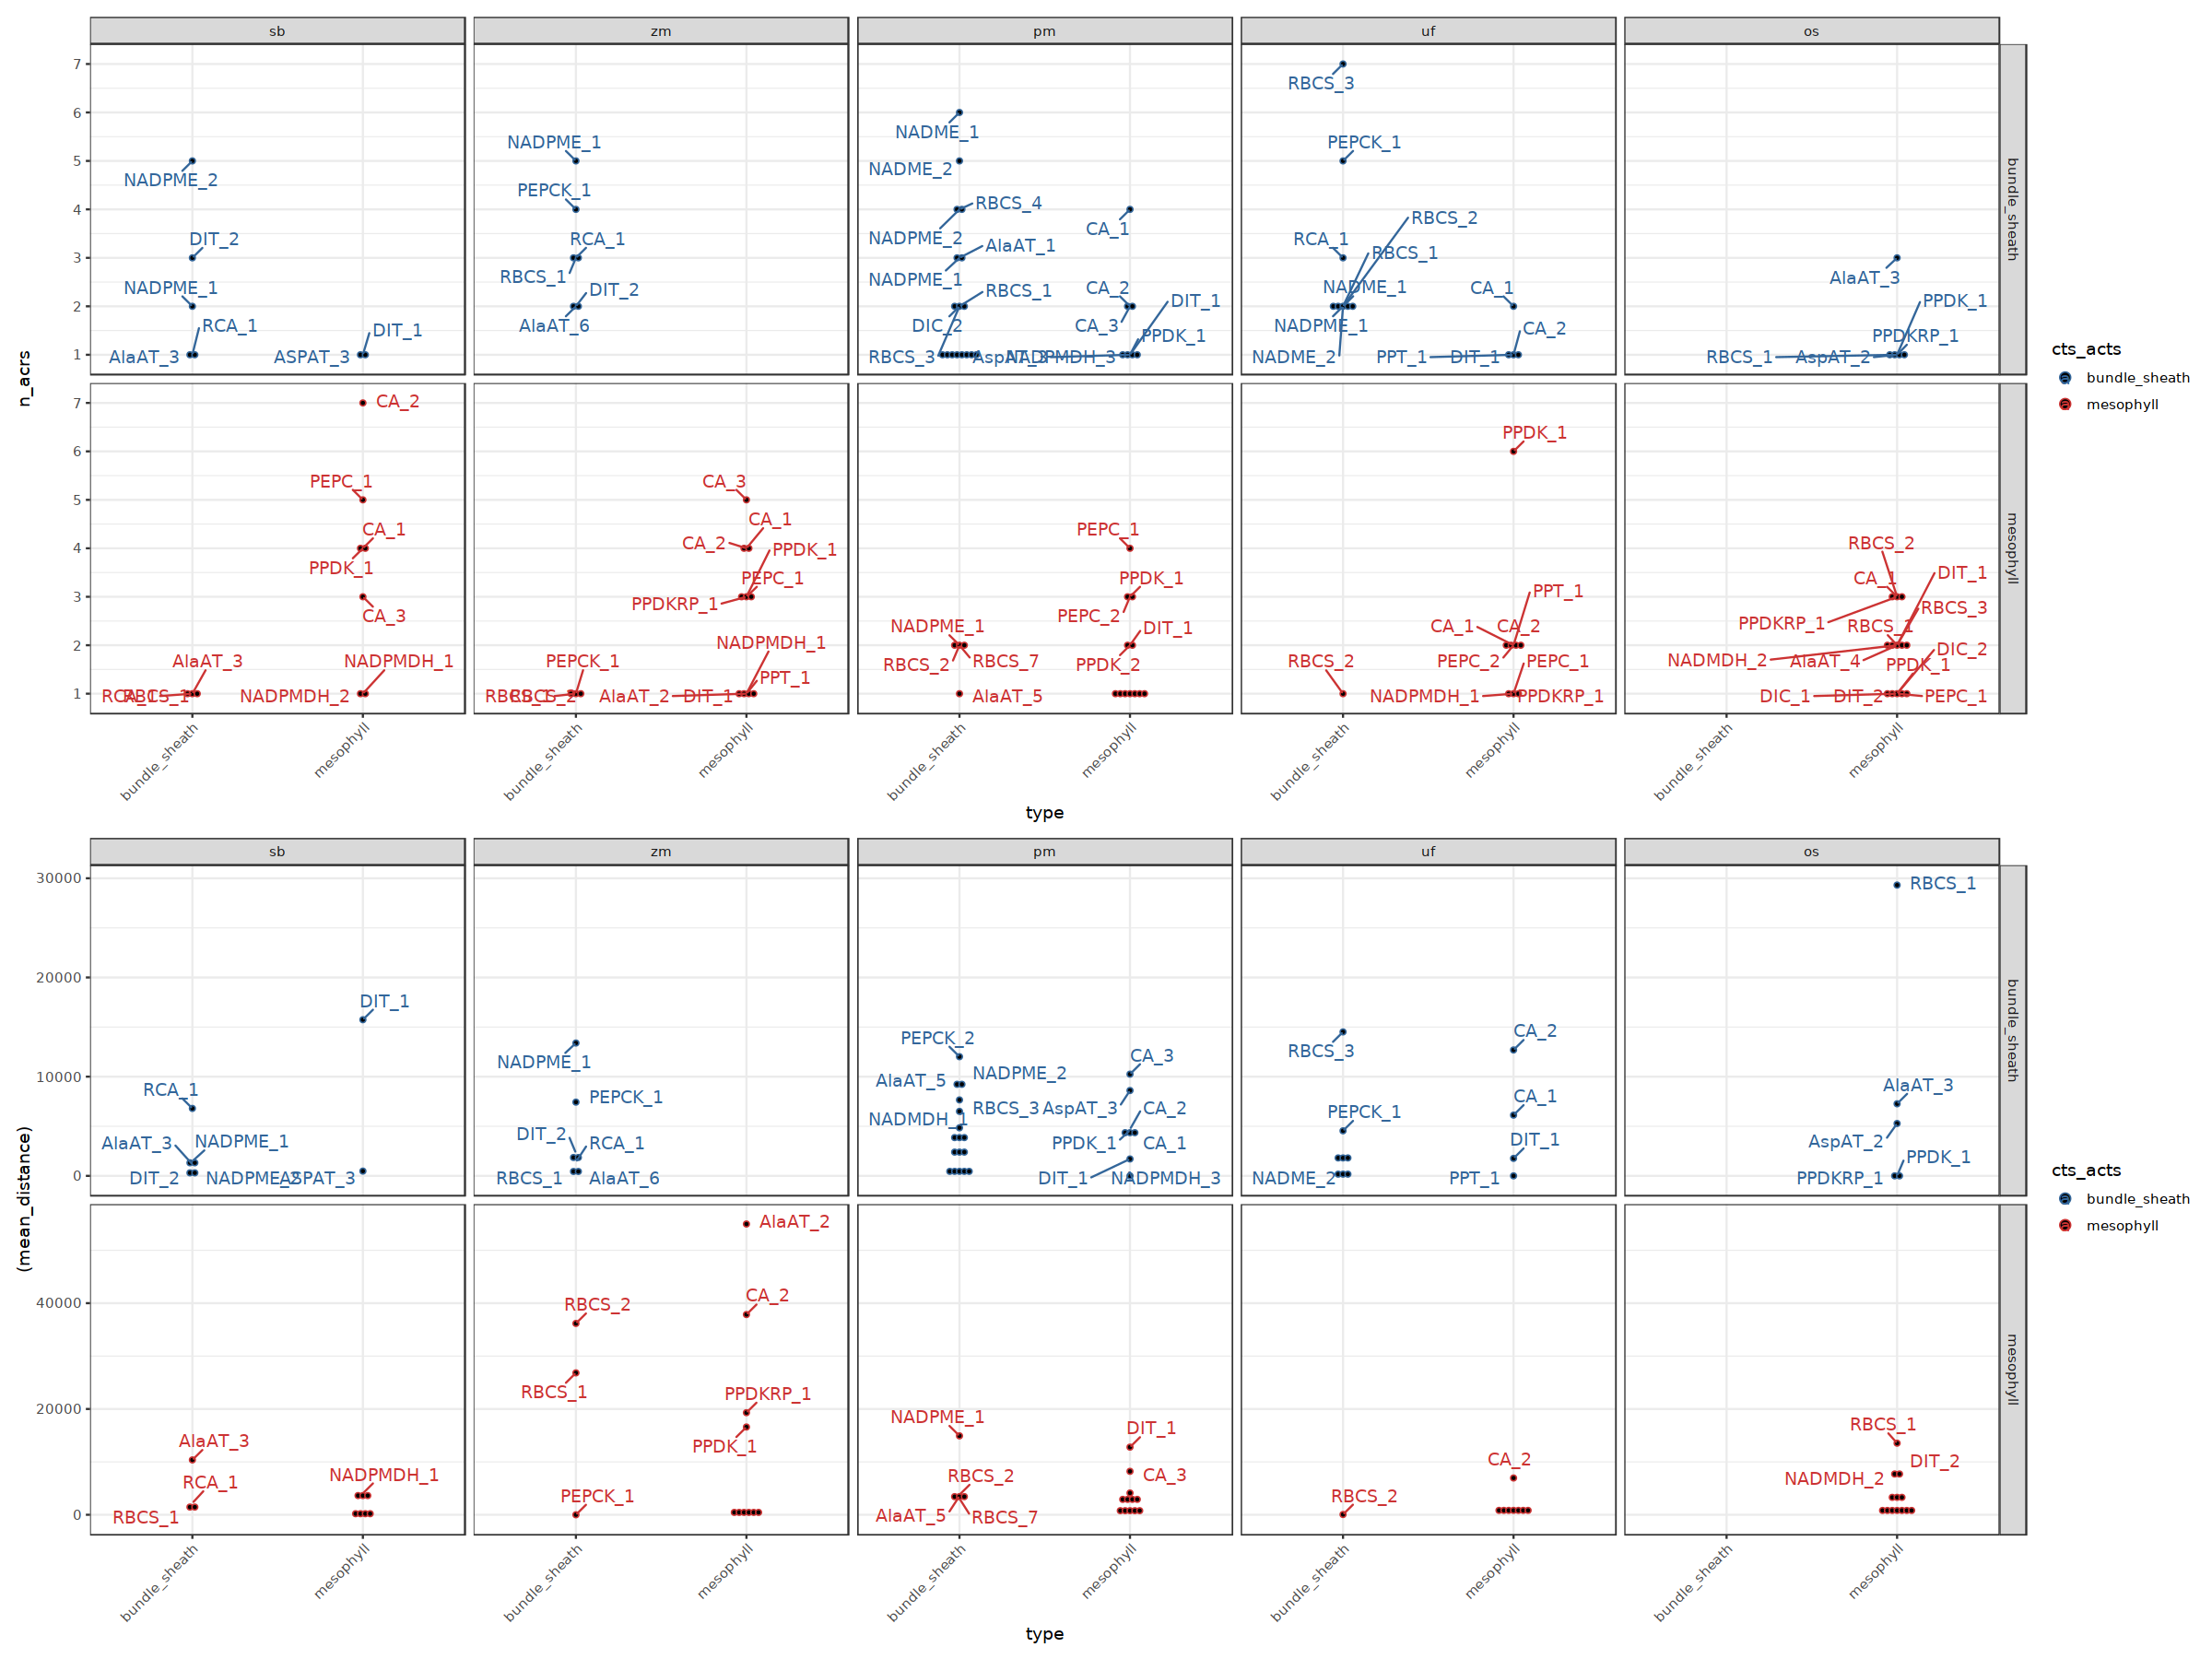

In [16]:
options(repr.plot.width=20, repr.plot.height=15)

combined_number_acrs_dotplots <- n_acrs_dotplot/distance_dotplot
combined_number_acrs_dotplots

In [17]:
ggsave(filename = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_4/number_distance_distal_ACRs.BS_MS.pdf", 
       plot = combined_number_acrs_dotplots, device = "pdf", width = 20, height = 15)


Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics we

In [43]:
# graphing_matrix_c4_genes_remove_introns <- combined_C4_genes_acr_intersections_distance %>% 
#     ungroup() %>% 
#     dplyr::filter(distance > 0) %>% 
#     group_by(species, X5,cts_acts) %>% 
#     summarise(n_acrs = n(),
#              mean_distance = median(distance, na.rm = TRUE))


# graphing_matrix_c4_genes_remove_introns$species <- factor(graphing_matrix_c4_genes_remove_introns$species, levels = c("sb", "zm", "pm", "uf", "os"))
# removing_introns <- ggplot(graphing_matrix_c4_genes_remove_introns, aes(y = mean_distance, x = n_acrs, color = cts_acts, label = X5)) +
#     geom_point() +  
#     geom_text_repel() + 
#     facet_grid(species ~ ., scales = "free") + 
#     scale_x_continuous(breaks = unique(graphing_matrix_c4_genes$n_acrs))

`summarise()` has grouped output by 'species', 'X5'. You can override using the
`.groups` argument.


Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 49 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 44 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


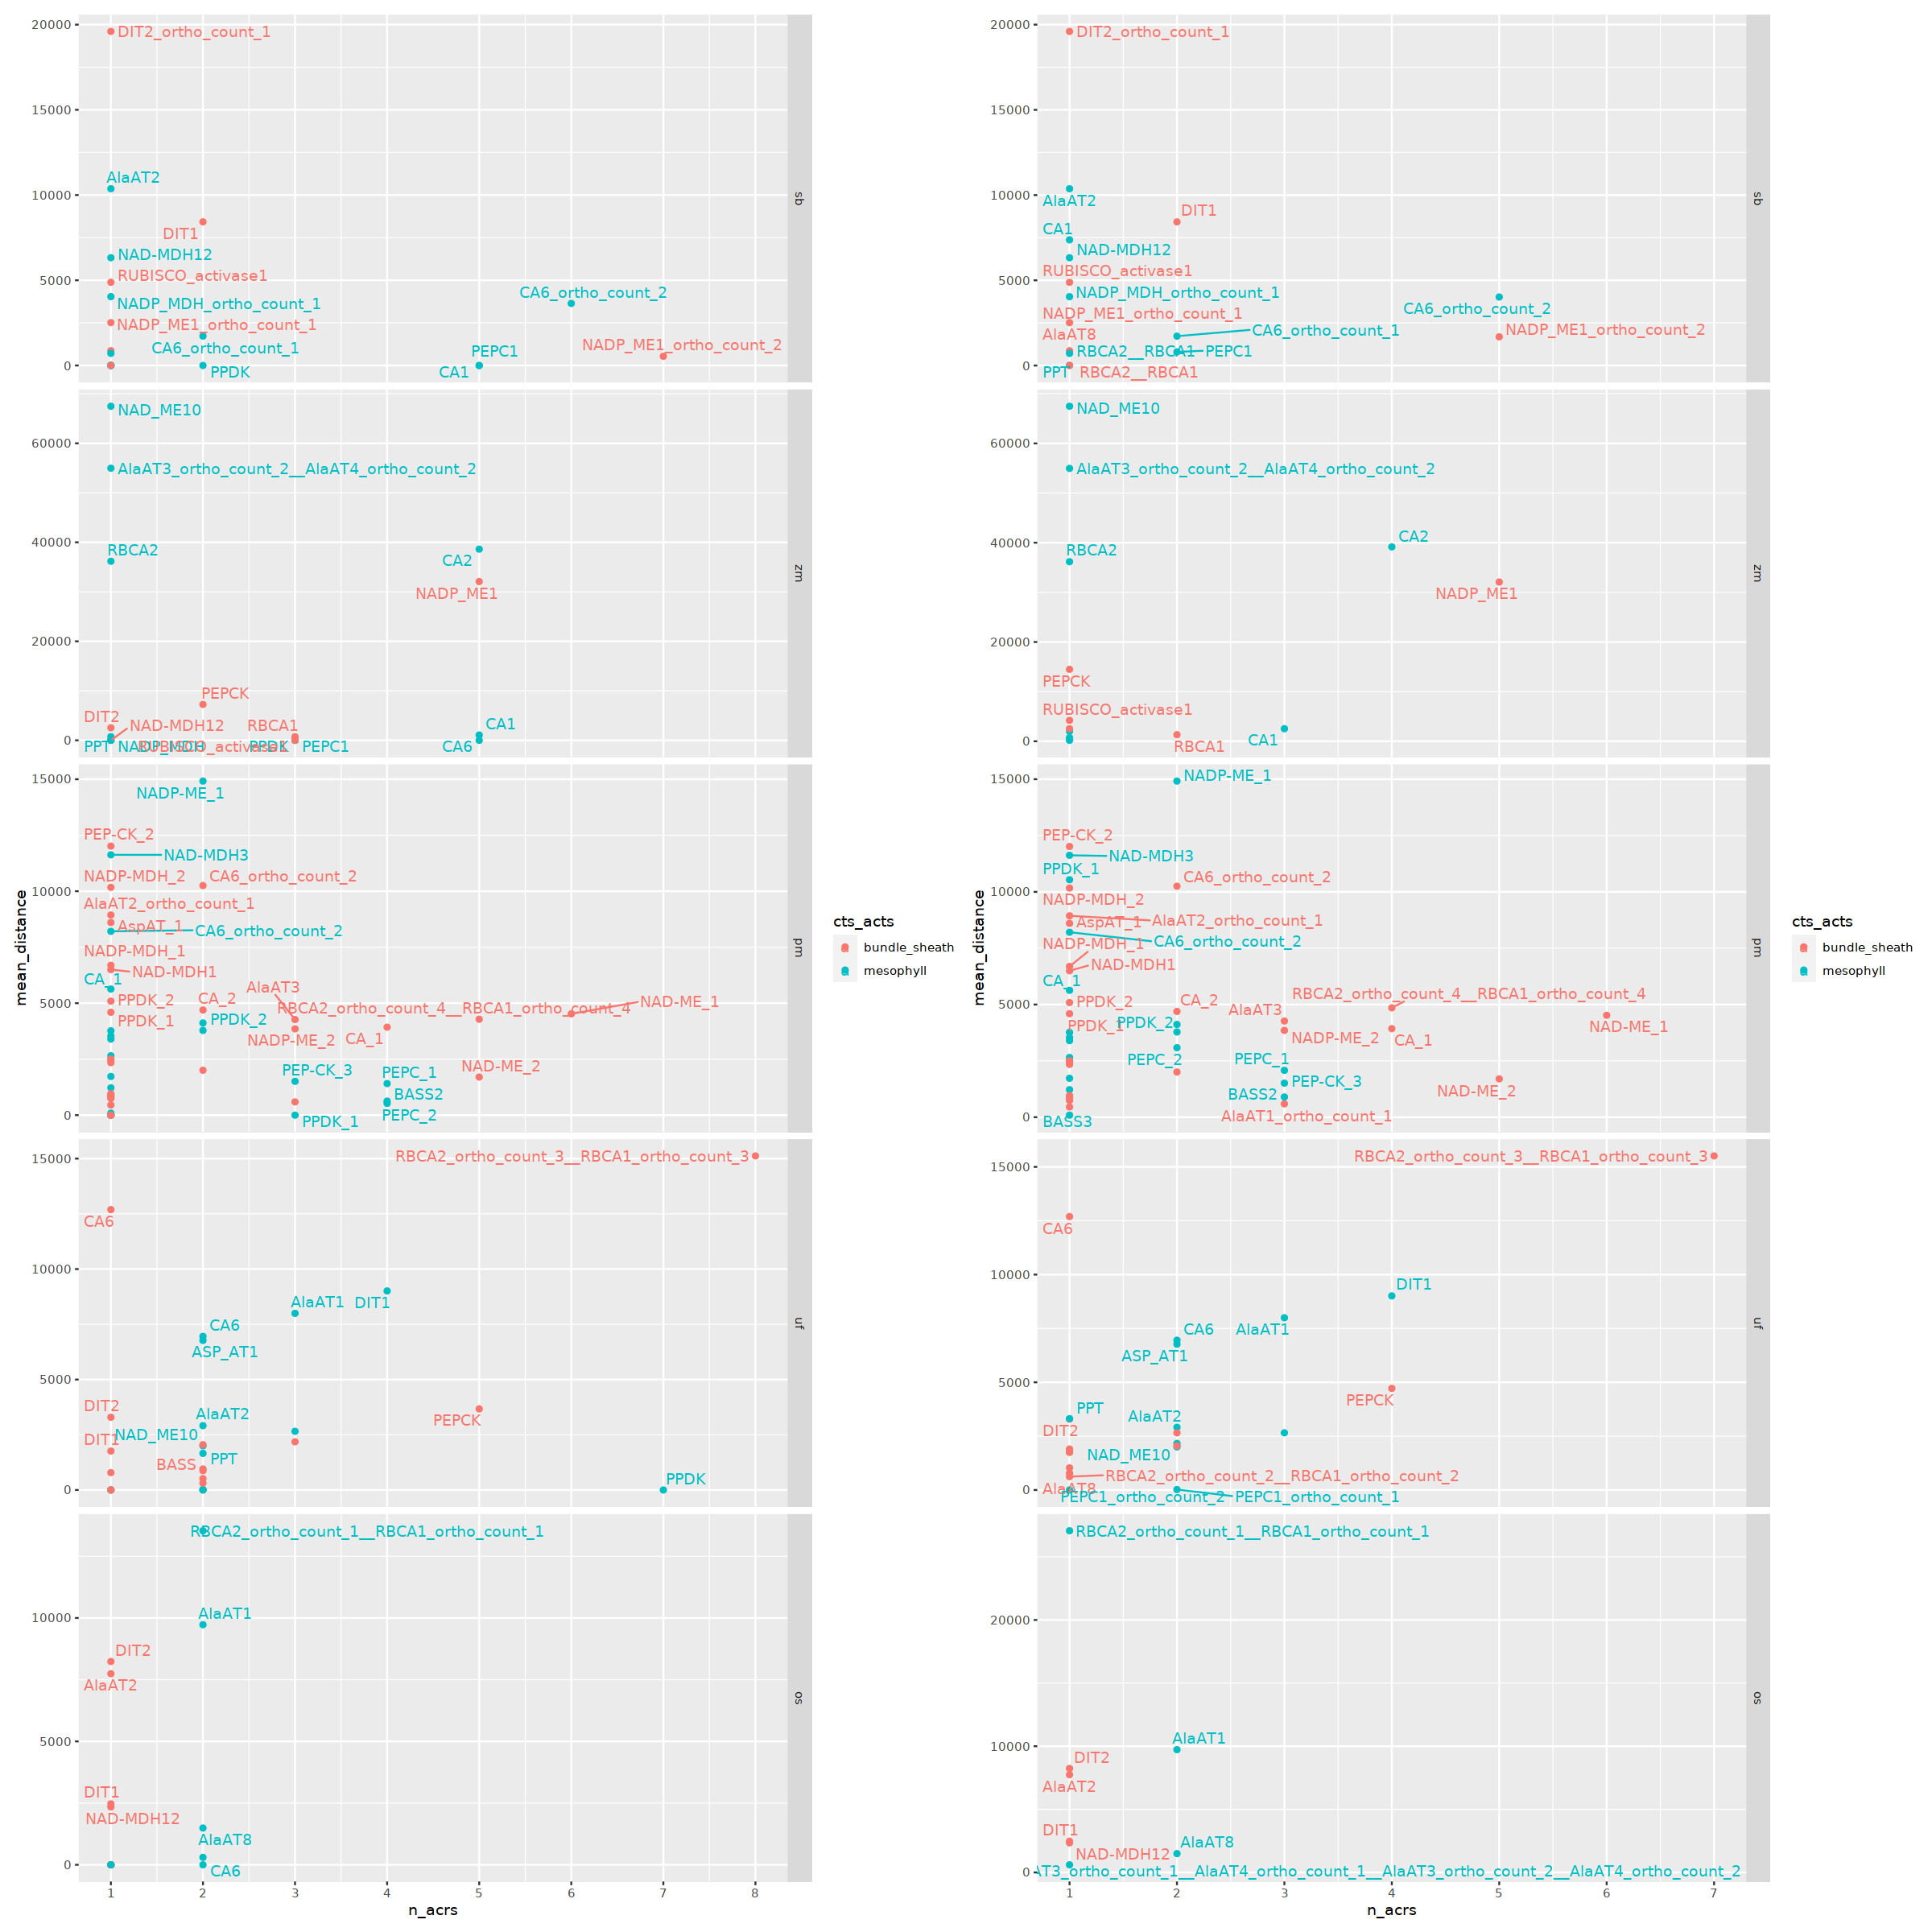

In [46]:
# library(patchwork)
# options(repr.plot.width=20, repr.plot.height=20)
# all_acrs_close + removing_introns

# OLD ANALYSIS - NOT USED

In [5]:
# process_data <- function(input_file, value_threshold = 0.9) {
  
#   # Read the data
#   output <- read_csv(input_file, col_names = c("id", "Peak1", "Peak2", "value"), 
#                    skip = 1) %>% 
#     select(-id) %>% # Remove the first column
#     mutate(generate_name = str_c(Peak1, Peak2, sep = "__")) %>% 
#     separate(Peak1, into = c("chr1", "start1", "end1"), sep = "_") %>% # Separate values for Peak1
#     separate(Peak2, into = c("chr2", "start2", "end2"), sep = "_") %>% 
#     dplyr::mutate(strand1 = ".") %>% 
#     dplyr::mutate(strand2 = ".") %>% 
#     dplyr::filter(value > value_threshold) %>% 
#     dplyr::select(chr1, start1, end1, chr2, start2, end2, generate_name, strand1, strand2, value)

#   return(output)
# }

# filer_cicero_hits <- function(cicero_results, filter_val){
    
#     cicero_results.filtered <- cicero_results %>% 
#         dplyr::filter(value > filter_val)
#     return(cicero_results.filtered)
    
# }

# zm_cicero <- process_data("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/cicero.bundle_sheath.output.csv", 0)
# #os_cicero <- process_data("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/os.cicero.bundle_sheath.output.csv",0)
# #pm_cicero <- process_data("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/pm.cicero.bundle_sheath.output.csv",0)
# sb_cicero <- process_data("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/sb.cicero.bundle_sheath.output.csv",0)
# #uf_cicero <- process_data("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/uf.cicero.bundle_sheath.output.csv",0)

In [178]:
# hist(sb_cicero$value)
# quantile(sb_cicero$value)

# hist(zm_cicero$value)
# quantile(zm_cicero$value)

# sb_cicero.filtered <- filer_cicero_hits(sb_cicero, .02)
# zm_cicero.filtered <- filer_cicero_hits(zm_cicero, .02)

# write_delim(zm_cicero.filtered, 
#             file = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/zm.bs.filtered_cicero.bed",
#             delim = "\t",   col_names =FALSE)
            
            
            

In [8]:
# pm_marker_genes <- read_delim("/home/jpm73279/genome_downloads/Pmiliaceum/markers/Pm.C4_markers.all.txt", delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
#         dplyr::select("chrom","start","end","geneID","name","type")
# zm_markers <- read_delim("/home/jpm73279/genome_downloads/Zm-B73-REFERENCE-NAM-5.0/markers/C4_markers.txt", delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
#     dplyr::select("chrom","start","end","geneID","name","type")
# sb_marker_genes <- read_delim("/scratch/jpm73279/comparative_single_cell/15.snakemake_marker_ID/02.visualization_annotation/Sb.orthos_from.Zm.markers.tis_leaf.visualize.txt", delim = "\t", col_names = TRUE) %>% 
#         dplyr::select("chr","star","end","geneID","name","type")
# os_marker_genes <- read_delim("/home/jpm73279/genome_downloads/Osativa/v7.0/Rice_markers/Os.leaf_markers_from_haidong.markers_from_pm.visualize.C4_markers_maize.txt", delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
#         dplyr::select("chrom","start","end","geneID","name","type")
# uf_marker_genes <- read_delim("/scratch/jpm73279/comparative_single_cell/15.snakemake_marker_ID/02.visualization_annotation/Uf.orthos_from.Zm.markers.tis_leaf.visualize.txt", delim = "\t", col_names = c("chrom", "start", "end", "geneID", "name", "type")) %>% 
#     dplyr::select("chrom","start","end","geneID","name","type")


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 62 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): chrom, geneID, name, type, X7
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 31 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): chrom, geneID, name, type, X7, X8
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 31 Columns: 6
── Column specification ────────────

In [109]:
Zm.bs_interactions <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Zm.bs.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE)
Zm.ms_interactions <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Zm.ms.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE)

Rows: 1930 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (11): X2, X3, X8, X9, X11, X12, X14, X15, X17, X18, X22

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1930 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (11): X2, X3, X8, X9, X11, X12, X14, X15, X17, X18, X22

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [110]:
zm_bs_interactions <- Zm.bs_interactions %>% 
    dplyr::filter(X12 <= 200000)

zm_ms_interactions <- Zm.ms_interactions %>% 
    dplyr::filter(X12 <= 200000)

In [113]:
zm_bs_genes_unique_acr <- zm_bs_interactions %>% 
    dplyr::filter(X6 == "bundle_sheath") %>% 

    dplyr::group_by(X4,X5,X6) %>% 
    summarise(ct_acrs = n_distinct(X10),
             mean_distance = mean(X12, na.rm = TRUE)) %>% 
    dplyr::mutate(cts_acts = "bs") %>% 
    dplyr::mutate(species = "zm")

zm_ms_genes_unique_acr <- zm_ms_interactions %>% 
    dplyr::filter(X6 == "mesophyll") %>% 

    dplyr::group_by(X4,X5,X6) %>% 
    summarise(ct_acrs = n_distinct(X10),
             mean_distance = mean(X12, na.rm = TRUE)) %>% 
    dplyr::mutate(cts_acts = "ms") %>% 
    dplyr::mutate(species = "zm")

`summarise()` has grouped output by 'X4', 'X5'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'X4', 'X5'. You can override using the
`.groups` argument.


In [84]:
Zm.bs_interactions <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Zm.bs.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE)
Zm.ms_interactions <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Zm.ms.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE)

Rows: 1930 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (11): X2, X3, X8, X9, X11, X12, X14, X15, X17, X18, X22

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1930 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (11): X2, X3, X8, X9, X11, X12, X14, X15, X17, X18, X22

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [52]:
head(sb_bs_genes_unique_acr)

X4,X5,X6,ct_acrs,mean_distance,cts_acts,species
<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
Sobic.001G073900,NAD-MDH12,bundle_sheath,3,113253.00,bs,sb
Sobic.001G191300,BASS,bundle_sheath,2,135279.00,bs,sb
Sobic.002G141900,NHD1__NHD2,bundle_sheath,2,123277.50,bs,sb
Sobic.002G230100,CA4,mesophyll,2,131015.00,bs,sb
Sobic.002G233700,DIT1,bundle_sheath,9,68223.11,bs,sb
Sobic.002G375800,AlaAT2,mesophyll,2,21119.50,bs,sb


In [85]:
sb_bs_genes_unique_acr <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Sb.bs.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE) %>% 
    dplyr::filter(X6 == "bundle_sheath") %>% 
    dplyr::filter(X12 <= 200000) %>% 
    dplyr::group_by(X4,X5,X6) %>% 
    summarise(ct_acrs = n_distinct(X10),
             mean_distance = mean(X12, na.rm = TRUE)) %>% 
    dplyr::mutate(cts_acts = "bs") %>% 
    dplyr::mutate(species = "sb")

sb_ms_genes_unique_acr <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Sb.ms.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE) %>% 
    dplyr::filter(X6 == "mesophyll") %>% 
    dplyr::filter(X12 <= 200000) %>% 
    dplyr::group_by(X4,X5,X6) %>% 
    summarise(ct_acrs = n_distinct(X10),
             mean_distance = mean(X12, na.rm = TRUE)) %>% 
    dplyr::mutate(cts_acts = "ms") %>% 
    dplyr::mutate(species = "sb")


Rows: 310 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X5, X6, X7, X10
dbl (6): X2, X3, X8, X9, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'X4', 'X5'. You can override using the
`.groups` argument.
Rows: 310 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X5, X6, X7, X10
dbl (6): X2, X3, X8, X9, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'X4', 'X5'. You can override using the
`.groups` argument.


In [104]:
pm_bs_genes_unique_acr <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/pm.bs.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE) %>% 
    dplyr::filter(X6 == "bundle_sheath") %>% 
    dplyr::filter(X12 <= 200000) %>% 
    dplyr::group_by(X4,X5,X6) %>% 
    summarise(ct_acrs = n_distinct(X10),
             mean_distance = mean(X12, na.rm = TRUE)) %>% 
    dplyr::mutate(cts_acts = "bs") %>% 
    dplyr::mutate(species = "pm")

pm_ms_genes_unique_acr <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/cicero/pm.ms.acrs.C4_markers.cicero.bed", delim = "\t",col_names = FALSE) %>% 
    dplyr::filter(X6 == "mesophyll") %>% 
    dplyr::filter(X12 <= 200000) %>% 
    dplyr::group_by(X4,X5,X6) %>% 
    summarise(ct_acrs = n_distinct(X10),
             mean_distance = mean(X12, na.rm = TRUE)) %>% 
    dplyr::mutate(cts_acts = "ms") %>% 
    dplyr::mutate(species = "pm")


Rows: 620 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X5, X6, X7, X10
dbl (6): X2, X3, X8, X9, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'X4', 'X5'. You can override using the
`.groups` argument.
Rows: 620 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): X1, X4, X5, X6, X7, X10
dbl (6): X2, X3, X8, X9, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'X4', 'X5'. You can override using the
`.groups` argument.


In [105]:
combined_acrs_species <- bind_rows(sb_bs_genes_unique_acr, sb_ms_genes_unique_acr,
         zm_bs_genes_unique_acr, zm_ms_genes_unique_acr,
                                  pm_bs_genes_unique_acr, pm_ms_genes_unique_acr)

In [106]:
glimpse(combined_acrs_species)

Rows: 94
Columns: 7
Groups: X4, X5 [94]
$ X4            <chr> "Sobic.001G073900", "Sobic.001G191300", "Sobic.002G14190…
$ X5            <chr> "NAD-MDH12", "BASS", "NHD1__NHD2", "DIT1", "NADP_ME1_ort…
$ X6            <chr> "bundle_sheath", "bundle_sheath", "bundle_sheath", "bund…
$ ct_acrs       <int> 3, 2, 2, 9, 10, 6, 4, 4, 1, 10, 3, 3, 5, 6, 10, 10, 5, 5…
$ mean_distance <dbl> 113253.00, 135279.00, 123277.50, 68223.11, 8244.30, 8505…
$ cts_acts      <chr> "bs", "bs", "bs", "bs", "bs", "bs", "bs", "bs", "bs", "b…
$ species       <chr> "sb", "sb", "sb", "sb", "sb", "sb", "sb", "sb", "sb", "s…


Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


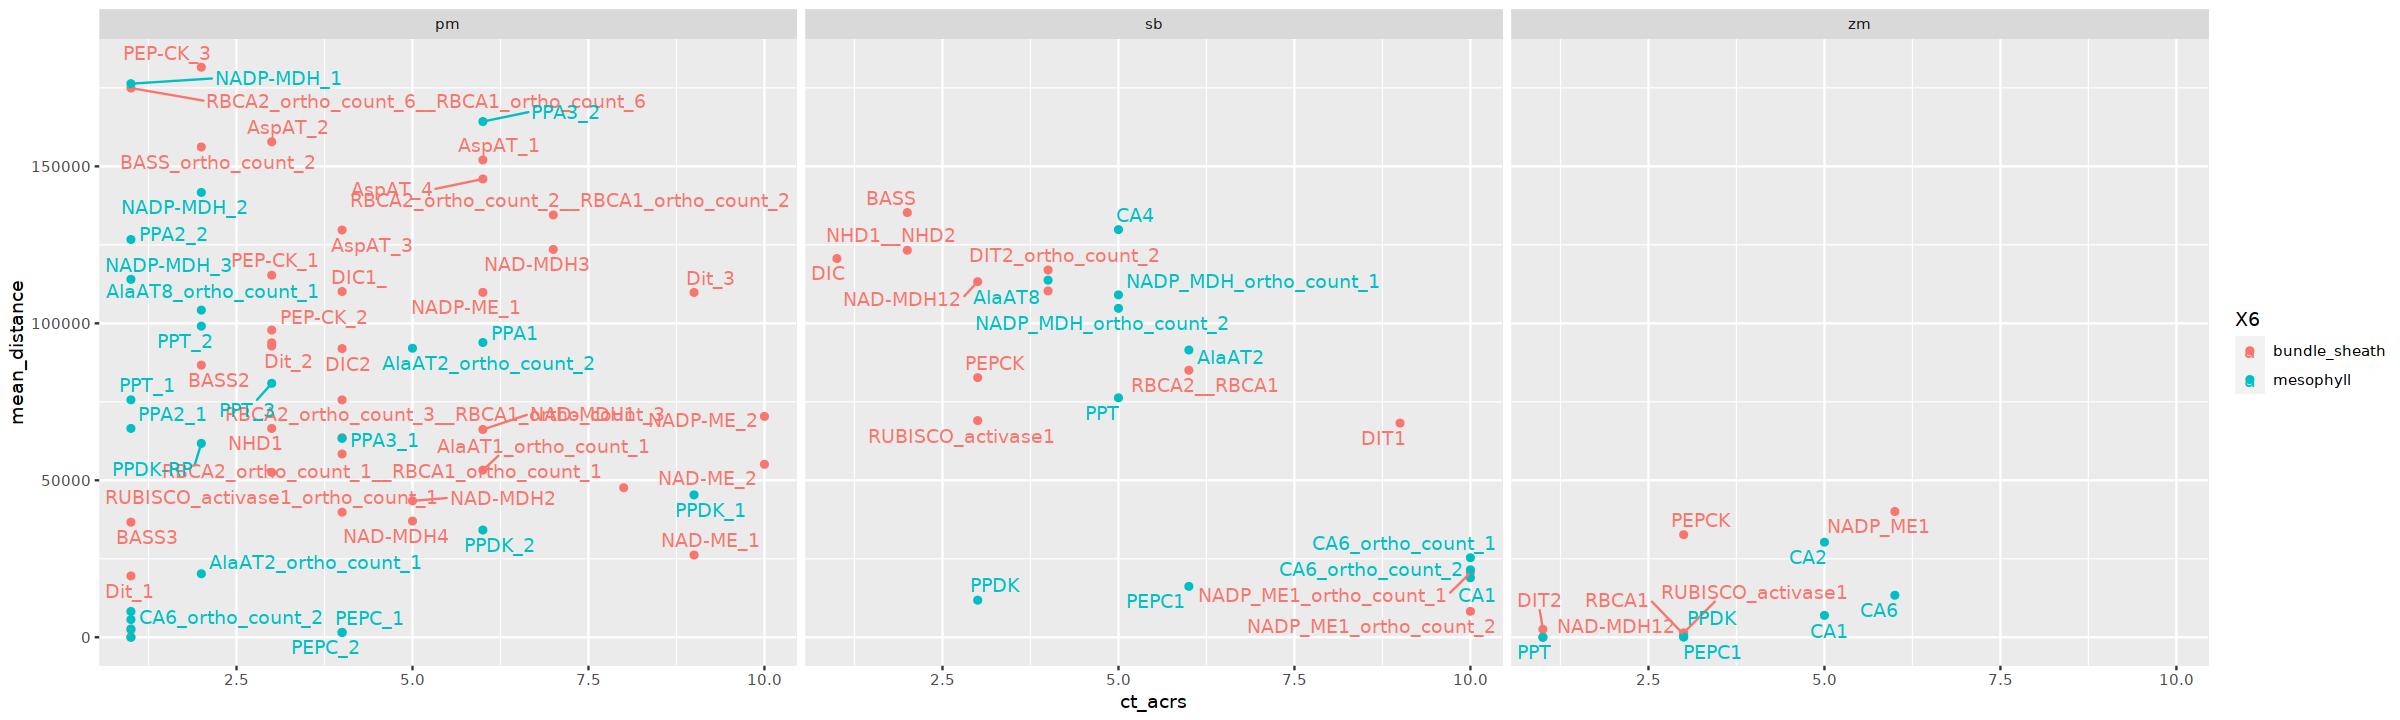

In [108]:
library(ggrepel)
options(ggrepel.max.overlaps = 8)
options(repr.plot.width=20, repr.plot.height=6)
ggplot(combined_acrs_species, aes(x = ct_acrs, y = mean_distance, label = X5, color = X6)) +
  geom_point() + geom_text_repel() + facet_grid(.~species)



In [3]:
# Define a function to read the data and add columns
read_and_annotate <- function(file_path, cell_type, species_abbr) {
  read_delim(file_path, delim = "\t", col_names = FALSE) %>%
    dplyr::mutate(
      cts_acts = cell_type,
      species = species_abbr
    )
}

In [120]:
# # Define the files and conditions to be processed
# files_conditions <- list(
#   list(path = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Zm.bs.acrs.C4_markers.cicero.bed", cell_type = "bundle_sheath", species = "zm"),
#   list(path = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Zm.ms.acrs.C4_markers.cicero.bed", cell_type = "mesophyll", species = "zm"),
#   list(path = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Sb.bs.acrs.C4_markers.cicero.bed", cell_type = "bundle_sheath", species = "sb"),
#   list(path = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/Sb.ms.acrs.C4_markers.cicero.bed", cell_type = "mesophyll", species = "sb"),
#   list(path = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/pm.bs.acrs.C4_markers.cicero.bed", cell_type = "bundle_sheath", species = "pm"),
#   list(path = "/scratch/jpm73279/comparative_single_cell/dev_location/cicero/pm.ms.acrs.C4_markers.cicero.bed", cell_type = "mesophyll", species = "pm")
# )

# # Read and annotate each file and store results in a list
# annotated_data_list <- lapply(files_conditions, function(condition) {
#   read_and_annotate(condition$path, condition$cell_type, condition$species)
# })

# # Combine results
# combined_acrs_species <- bind_rows(annotated_data_list)

Rows: 1930 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (11): X2, X3, X8, X9, X11, X12, X14, X15, X17, X18, X22

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1930 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (11): X2, X3, X8, X9, X11, X12, X14, X15, X17, X18, X22

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 26180 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): X1, X4, X5, X6, X7, X10, X13, X16, X19, X20, X21
dbl (10): X2, X3, X8, X9, X11, X

In [117]:
glimpse(combined_acrs_species)

Rows: 1,930
Columns: 24
$ X1       <chr> "chr1", "chr1", "chr1", "chr1", "chr1", "chr1", "chr1", "chr1…
$ X2       <dbl> 35692130, 35692130, 35692130, 35692130, 35692130, 35692130, 3…
$ X3       <dbl> 35696538, 35696538, 35696538, 35696538, 35696538, 35696538, 3…
$ X4       <chr> "Zm00001eb011080", "Zm00001eb011080", "Zm00001eb011080", "Zm0…
$ X5       <chr> "PEPCK", "PEPCK", "PEPCK", "PEPCK", "PEPCK", "PEPCK", "PEPCK"…
$ X6       <chr> "bundle_sheath", "bundle_sheath", "bundle_sheath", "bundle_sh…
$ X7       <chr> "chr1", "chr1", "chr1", "chr1", "chr1", "chr1", "chr1", "chr1…
$ X8       <dbl> 35691859, 35691859, 35691859, 35691859, 35691859, 35691859, 3…
$ X9       <dbl> 35692360, 35692360, 35692360, 35692360, 35692360, 35692360, 3…
$ X10      <chr> "scACR_1559;bundle_sheath", "scACR_1559;bundle_sheath", "scAC…
$ X11      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ X12      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ X13      <chr>